In [2]:
#importing libraries
# male = 1, female = 0
# Potential Biases: more males than females, right skewed

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from itertools import repeat
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#Setting random seed
np.random.seed(0)

In [4]:
# Reading csv file
data = pd.read_csv('https://raw.githubusercontent.com/plmkonist/AI4all/main/heart.csv')

In [5]:
# Viewing first 5 rows of data
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Dropping columns that are directly related to output (whether or not patient is experiencing a heart attack)
# Any columns explaining electrocardiogram results will be considered directly related
clean_data = data.drop(columns =['restecg', 'slp', 'oldpeak'])

In [7]:
clean_data

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,caa,thall,output
0,63,1,3,145,233,1,150,0,0,1,1
1,37,1,2,130,250,0,187,0,0,2,1
2,41,0,1,130,204,0,172,0,0,2,1
3,56,1,1,120,236,0,178,0,0,2,1
4,57,0,0,120,354,0,163,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,123,1,0,3,0
299,45,1,3,110,264,0,132,0,0,3,0
300,68,1,0,144,193,1,141,0,2,3,0
301,57,1,0,130,131,0,115,1,1,3,0


In [8]:
# Trying to find outliers
clean_data.describe()

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,149.646865,0.326733,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,22.905161,0.469794,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,4.000000,3.000000,1.000000


Potential Bias: Our data is skewed to the right

## Visualization For Assisting in Data Cleaning/Prepping Process

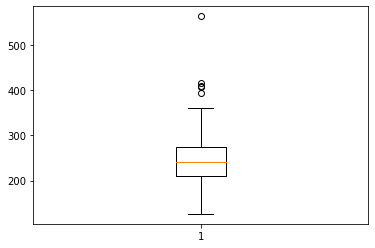

In [9]:
# Cholestrol column might have outliers so creating boxplot to view them
plt.boxplot(data.chol)
plt.show()

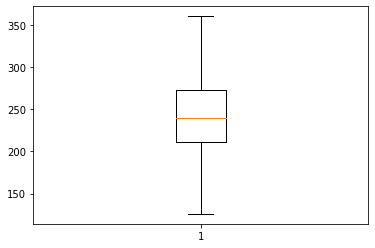

In [10]:
# Based on boxplot, datapoint (cholestrol number) is considered an outlier if above 380, so removing those data entries
clean_data['chol'] = clean_data['chol'].astype(float)
clean_data = clean_data[clean_data.chol <= 380.0]
plt.boxplot(clean_data.chol)
plt.show()


In [11]:
# Setting X (indepedent variables) and Y(dependent variable) for implementing Random Forest Classifier Model for predicting whether or not a patient is suffering a heart attack (0: no heart attack, 1: heart attack)
Y = clean_data.output
X = clean_data.drop(columns = ['output'])

# Visualization 1: Creating Heat Map from Confusion Matrix Dataframe

0.825


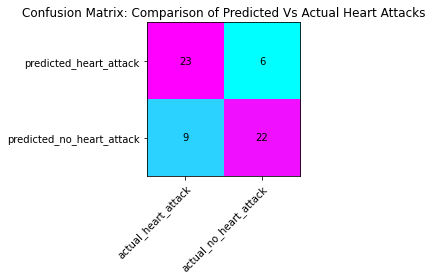

In [51]:
# Creating Random Forest Classifier Model and running it 30 times for greater accuracy
predictions = 0
avg_score = 0.0
ntimes = 10
clf = 0
for i in repeat(None, ntimes):

    # train model with 80% of the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    # prediction
    # Creating a random forest classifier
    clf = RandomForestClassifier(n_jobs = 2, random_state = 0, n_estimators = 40)
    # Training Classifier
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    # compute model accuracy
    avg_score += accuracy_score(y_test, predictions)

avg_score/= ntimes
print(avg_score)

# Creating confusion matrix and assigning it to "array"
array = pd.crosstab(y_test, predictions, rownames = ['Actual result'], colnames = ['Predicted Result'])
# Picking list of x axes labels of heat map
actual_result = ["actual_heart_attack", "actual_no_heart_attack"]
# Picking list of y axes labels of heat map
predicted_result = ["predicted_heart_attack", "predicted_no_heart_attack"]
# Converting confusion matrix dataframe to an array
confusion_matrix = np.array(array)


# Code for printing heat map
fig, ax = plt.subplots()
# Inputting 2D array: confusion_matrix(converted from dataframe to array) into design for heat map
im = ax.imshow(confusion_matrix, cmap = 'cool')
#im = ax.imshow(confusion_matrix, cmap = 'Greens')
#im = ax.imshow(confusion_matrix, cmap = 'Cool')

# Ticks for x and y axis
ax.set_xticks(np.arange(len(predicted_result)))
ax.set_yticks(np.arange(len(actual_result)))

# Assigning x and y axes labels of heat map
ax.set_xticklabels(actual_result)
ax.set_yticklabels(predicted_result)
# Rotate the tick labels and set their alignment (for a better visual)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Putting confusion matrix array values in respective spots of heat map
for i in range(len(actual_result)):
    for j in range(len(predicted_result)):
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="black")
# Assigning title for heat map
ax.set_title("Confusion Matrix: Comparison of Predicted Vs Actual Heart Attacks")
fig.tight_layout()

plt.show()

# Visualization 2: Plotting a decision tree from one of the 20 trees in the last iteration of previous block's for loop

[Text(1114.2987804878048, 1556.6727272727271, 'X[9] <= 2.5\ngini = 0.494\nsamples = 152\nvalue = [106, 132]'),
 Text(595.4268292682926, 1408.418181818182, 'X[7] <= 0.5\ngini = 0.354\nsamples = 95\nvalue = [34, 114]'),
 Text(265.390243902439, 1260.1636363636362, 'X[4] <= 228.0\ngini = 0.234\nsamples = 76\nvalue = [16, 102]'),
 Text(108.8780487804878, 1111.909090909091, 'X[6] <= 93.0\ngini = 0.038\nsamples = 34\nvalue = [1, 51]'),
 Text(54.4390243902439, 963.6545454545454, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(163.3170731707317, 963.6545454545454, 'gini = 0.0\nsamples = 33\nvalue = [0, 51]'),
 Text(421.9024390243902, 1111.909090909091, 'X[4] <= 237.5\ngini = 0.351\nsamples = 42\nvalue = [15, 51]'),
 Text(272.1951219512195, 963.6545454545454, 'X[8] <= 0.5\ngini = 0.198\nsamples = 6\nvalue = [8, 1]'),
 Text(217.7560975609756, 815.4, 'X[0] <= 45.5\ngini = 0.444\nsamples = 2\nvalue = [2, 1]'),
 Text(163.3170731707317, 667.1454545454545, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),

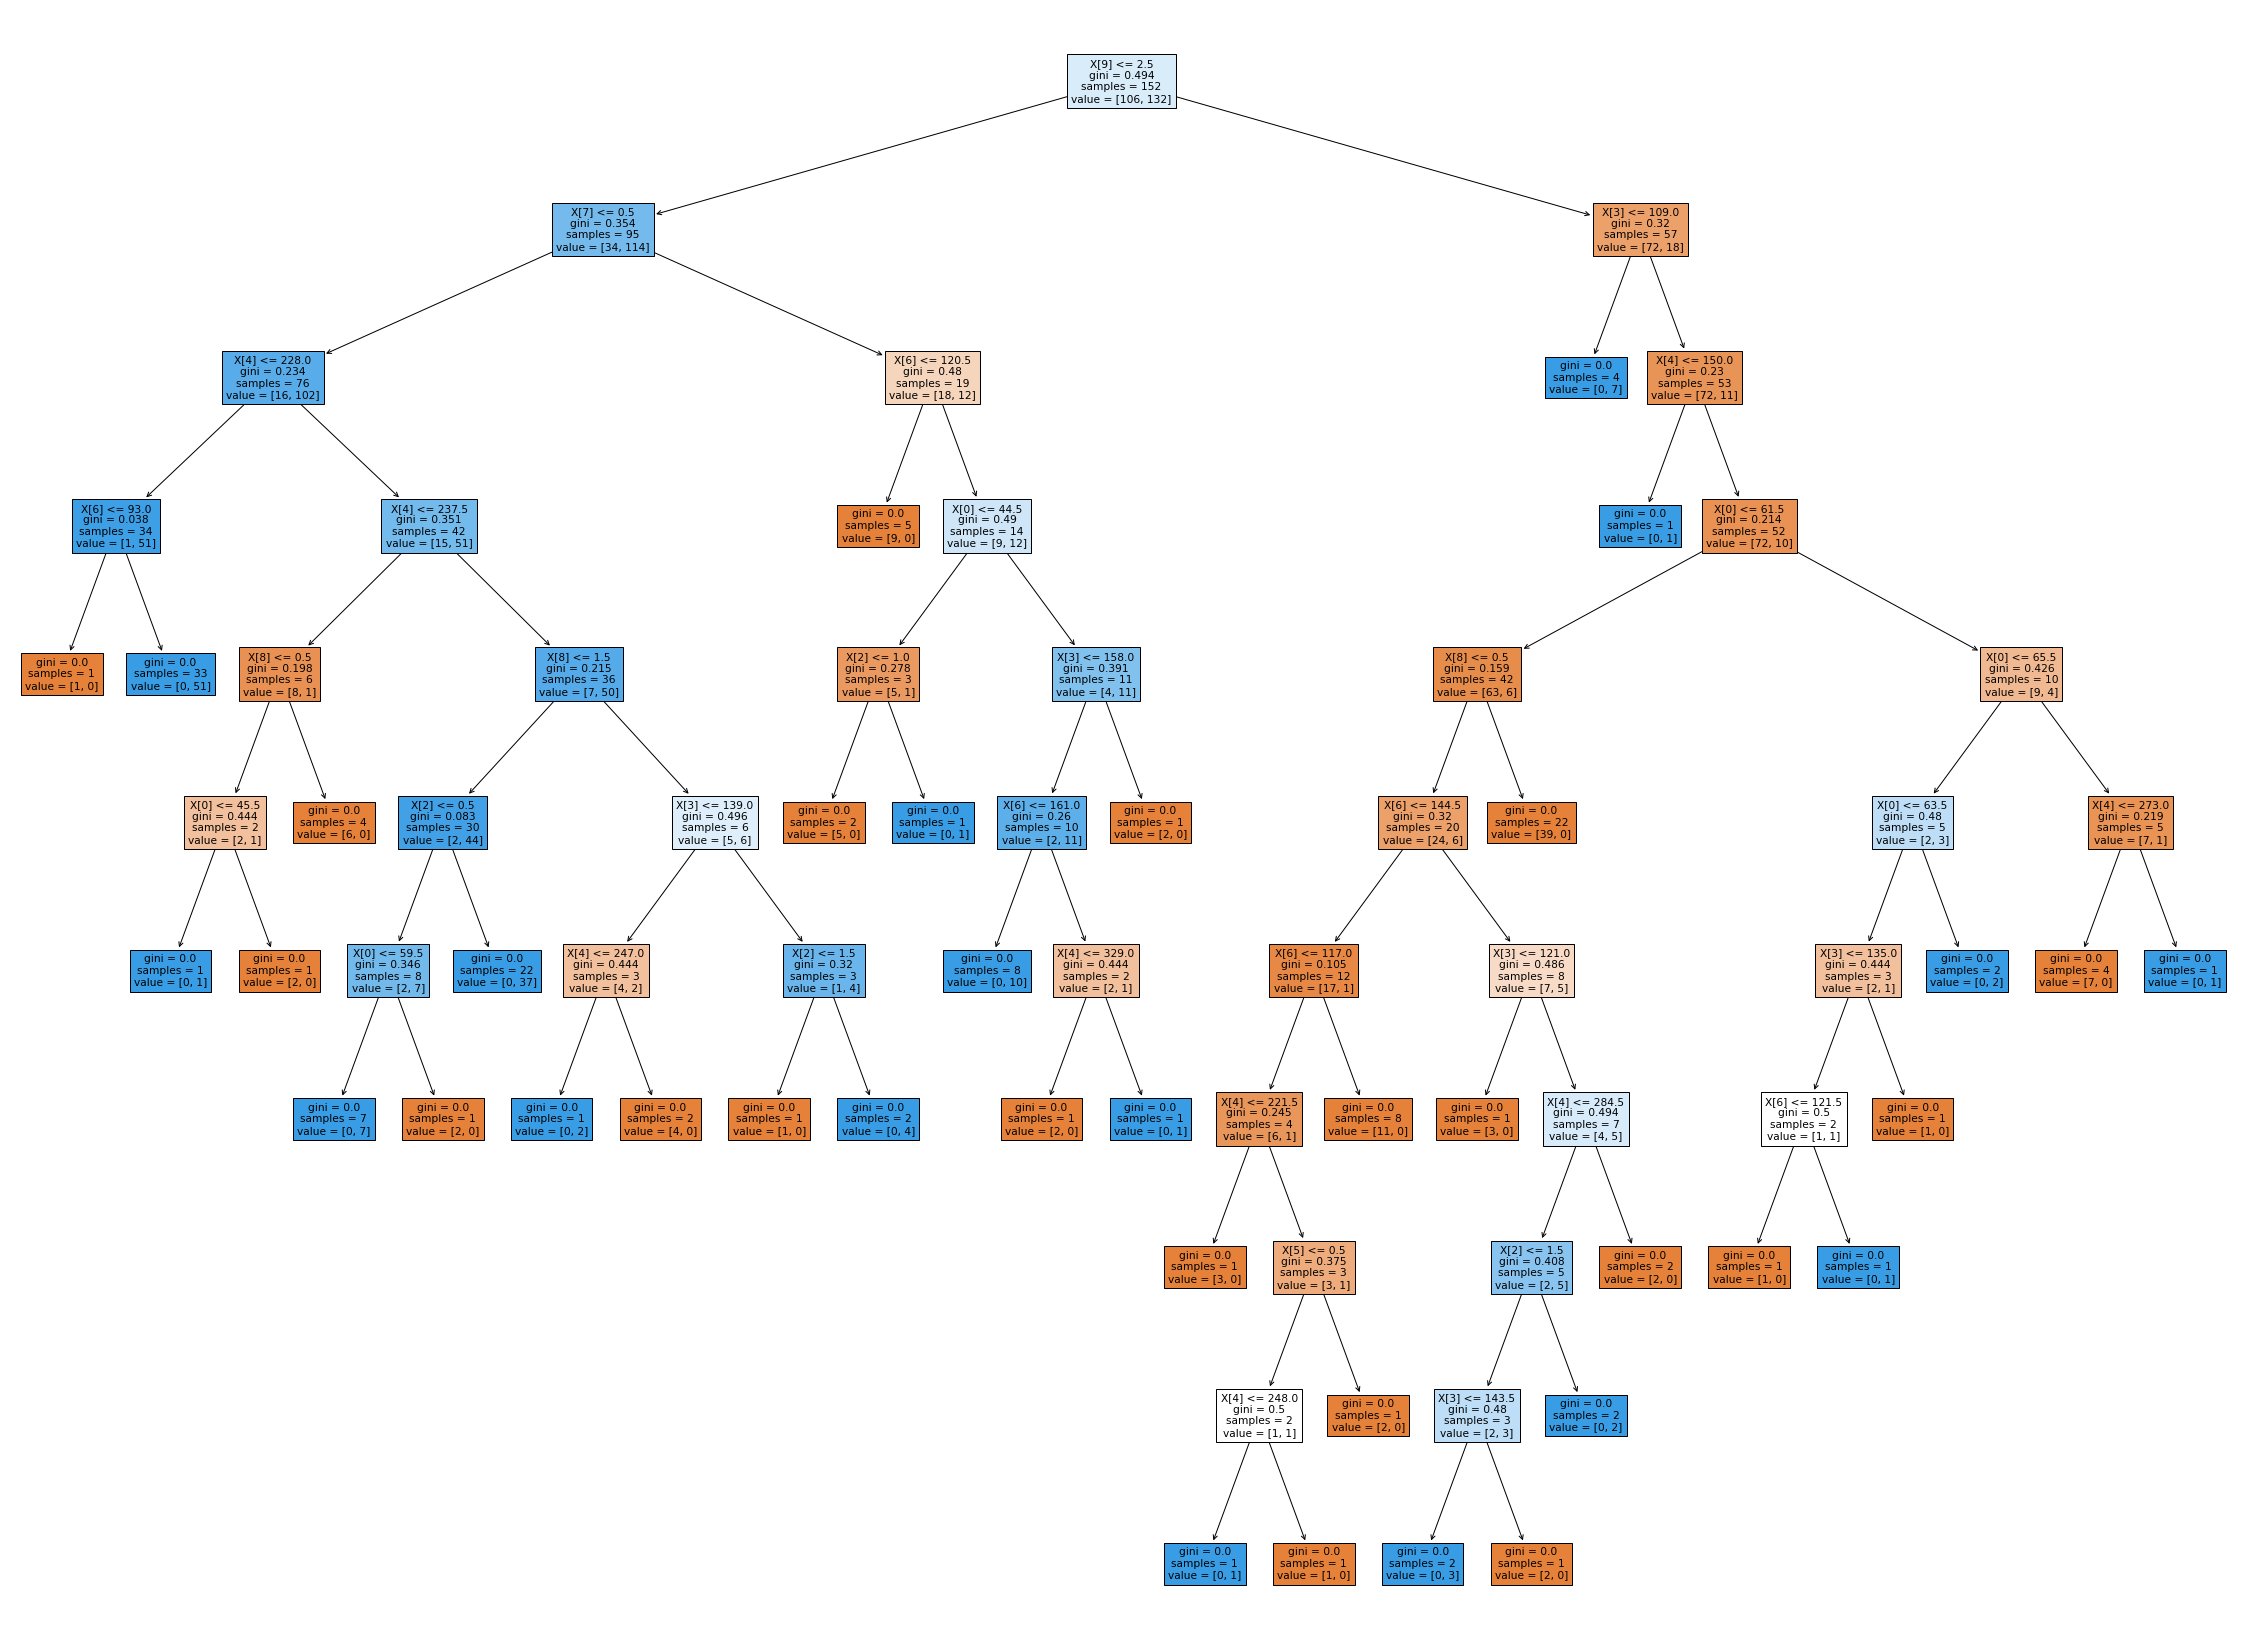

In [13]:
#Plots second decision tree out of the 20
plt.figure(figsize = (40,30))
tree.plot_tree(clf.estimators_[1], filled = True)

# Visualization number 3: Multiple bar graph depicting frequency of heart attacks for varying cholestrol levels


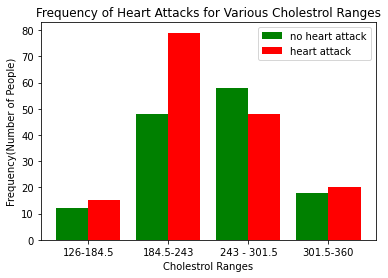

In [14]:
# Assigning x labels for bar graphs (Ranges of cholestrol numbers)
X_labels = ['126-184.5','184.5-243','243 - 301.5','301.5-360']

# Y axis: Finding number of people who did not suffer a heart attack with cholestrol ranges given above
no_attack = [len( clean_data[(clean_data.chol >= 126.0) & (clean_data.chol < 184.5) & (clean_data.output == 0)]), 
             len( clean_data[(clean_data.chol >= 184.5) & (clean_data.chol < 243) & (clean_data.output == 0)]),
len( clean_data[(clean_data.chol >= 243.0) & (clean_data.chol < 301.5) & (clean_data.output == 0)]),
len( clean_data[(clean_data.chol >= 301.5) & (clean_data.chol <= 360) & (clean_data.output == 0)])]

# Y axis: Finding number of people who suffered a heart attack with cholestrol ranges given above
attack = [len( clean_data[(clean_data.chol >= 126.0) & (clean_data.chol < 184.5) & (clean_data.output == 1)]), 
          len( clean_data[(clean_data.chol >= 184.5) & (clean_data.chol < 243) & (clean_data.output == 1)]),
len( clean_data[(clean_data.chol >= 243.0) & (clean_data.chol < 301.5) & (clean_data.output == 1)]),
len( clean_data[(clean_data.chol >= 301.5) & (clean_data.chol <= 360) & (clean_data.output == 1)])]

X_axis = np.arange(len(X_labels))

# Setting ideal positions for visual alignment in code for plotting bars
plt.bar(X_axis - 0.2, no_attack, 0.4, label = 'no heart attack', color = 'green')
plt.bar(X_axis + 0.2, attack, 0.4, label = 'heart attack', color = 'red')

#Setting labels  
plt.xticks(X_axis, X_labels)
plt.xlabel("Cholestrol Ranges")
plt.ylabel("Frequency(Number of People)")
plt.title("Frequency of Heart Attacks for Various Cholestrol Ranges")
plt.legend()
plt.show()

# Visualization 4: Bar Graph Depicting Percentage of Heart Attacks For Varying Cholestrol Levels

In [15]:
# Finding percentages of heart attacks in all 4 cholestrol ranges and appending them to an array named "percentages". Using arrays in previous block access number of people in each cholestrol range.
percentages = []
for i in range(4):
    percentages.append(attack[i]/(attack[i] + no_attack[i]))
print(percentages)

[0.5555555555555556, 0.6220472440944882, 0.4528301886792453, 0.5263157894736842]


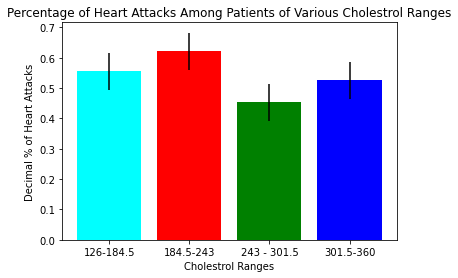

In [16]:
# Calculating standard deviation to calculate error bars for graph (will be the same for all 4 bars)
error = np.std(percentages)
plt.bar(X_labels, percentages, yerr = error, color=['cyan', 'red', 'green', 'blue'])

# Labeleing Graph
plt.xticks( X_labels)
plt.xlabel("Cholestrol Ranges")
plt.ylabel("Decimal % of Heart Attacks")
plt.title("Percentage of Heart Attacks Among Patients of Various Cholestrol Ranges")
# Show graph
plt.show()

# Visualization number 5: Stacked Multiple bar graph depicting frequency of heart attacks for varying cholestrol levels

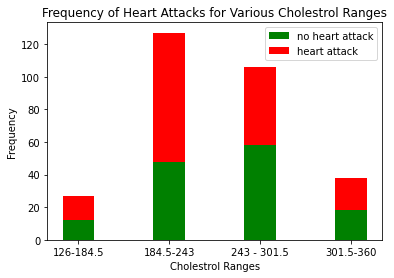

In [17]:
fig, ax = plt.subplots()

width = 0.35
# Setting bottom and top bars
ax.bar(X_labels, no_attack, width, label='no heart attack', color = 'green')
ax.bar(X_labels, attack, width, bottom=no_attack, label='heart attack', color = 'red')

# Setting labels for graph
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Heart Attacks for Various Cholestrol Ranges')
ax.set_xlabel('Cholestrol Ranges')
ax.legend()

plt.show()

# Sources For Assisting in Visualizations

### 1) For Boxplot - https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
### 2) Visulaization 1 - for loop design: Data Entropy Worksop, Random Forest Classifier and Confusion Matrix: https://www.youtube.com/watch?v=eM4uJ6XGnSM&t=172s, heat map: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
### 3) Visulaization 2 - https://www.youtube.com/watch?v=eM4uJ6XGnSM&t=172s
### 4) Visualization 3 - https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
### 5) Visualization 4 - Changing colors for bars: https://www.python-graph-gallery.com/3-control-color-of-barplots, Incorporating standard error bars: https://pythonforundergradengineers.com/python-matplotlib-error-bars.html
### 6) Visualization 5: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html
